## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [76]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
%matplotlib inline
import csv

#讀入資料
df = pd.read_csv("Titanic_train.csv")

#計算每一行是否有遺失值，計算遺失比例
print('計算每一行是否有遺失值，計算遺失比例')
missing_vals = df.isnull().sum()/len(df)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)
print()

# 細看遺失資料的樣態
print('查看遺失資料的明細')
missing_index=df.isnull()
display(df[missing_index.values==True])
print()



計算每一行是否有遺失值，計算遺失比例
             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245

查看遺失資料的明細


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


29.69911764705882
14.526497332334044


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


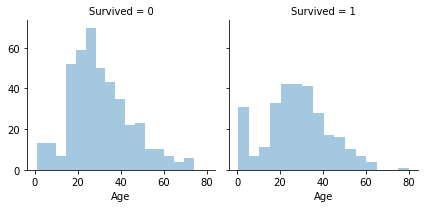

In [77]:
#觀察年齡
print(df['Age'].mean()) #age平均
print(df['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)


探討艙等和性別之間的關係


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Titanic sumery in different Class')

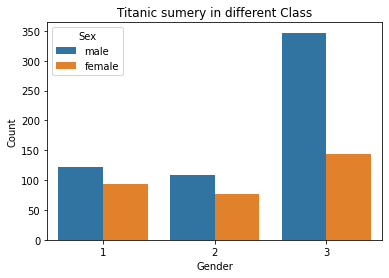

In [78]:
#探討艙等和性別之間的關係
print('探討艙等和性別之間的關係')
bar_width = 0.5
sns.countplot(mydata[ 'Pclass'], hue=df['Sex'])

plt.ylabel("Count")          # 設定y軸標題 
plt.xlabel("Gender")            # 設定x軸標題
plt.title("Titanic sumery in different Class", {'fontsize' :12})



探討年齡和艙等有無關聯


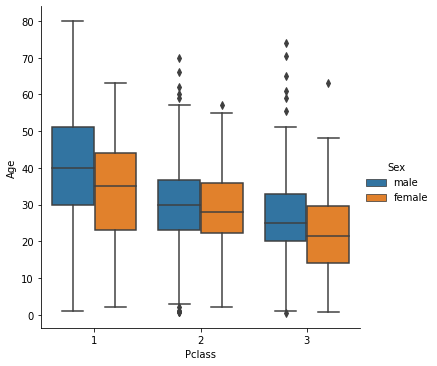

In [80]:
#探討年齡和艙等之間的關聯
print('探討年齡和艙等有無關聯')
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df,kind="box")


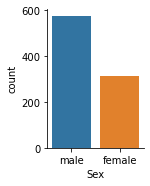

In [46]:
#男生女生個數

g = sns.catplot("Sex",
                data=mydata,
                kind="count", height=2.5, aspect=.8)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


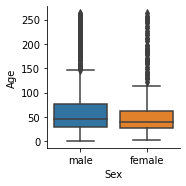

In [55]:
#男生女生中年齡分布

g = sns.catplot("Sex",'Age',
                data=mydata,
                kind="box", height=2.5, aspect=1)

In [82]:
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.

le = preprocessing.LabelEncoder()
df['Pclass']=le.fit_transform(df['Pclass'])

df['Sex']=le.fit_transform(df['Sex'])

data=df[['Sex','Age','Pclass']]
# KNN
#設定用多少鄰居資訊來補值
value_neighbors=1
from sklearn.impute import KNNImputer
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors=value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data))
#只呈現有遺失值的資料
display(data[missing_index.values==True])
#只呈現有遺失值的資料-呈現補值的結果
display(df_filled[missing_index.values==True])


,Sex,Age,Pclass
0,1,22.0,2
2,0,26.0,2
4,1,35.0,2
5,1,NaN,2
5,1,NaN,2
...,...,...,...
885,0,39.0,2
886,1,27.0,1
888,0,NaN,2
888,0,NaN,2


,0,1,2
0,1.0,22.0,2.0
2,0.0,26.0,2.0
4,1.0,35.0,2.0
5,1.0,22.0,2.0
5,1.0,22.0,2.0
...,...,...,...
885,0.0,39.0,2.0
886,1.0,27.0,1.0
888,0.0,26.0,2.0
888,0.0,26.0,2.0
